In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r'Y:\Krajina\GEOTUNDRA\SPEI_VH_2000_2024.csv')
df

In [3]:
# convert YYYY_WW to date (Monday of that ISO week)
df['date'] = pd.to_datetime(
    df['week'].str.replace('_', '-W') + '-1',
    format='%G-W%V-%u'
)

# extract year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# or combined column (YYYY_MM)
df['year_month'] = df['date'].dt.strftime('%Y_%m')

print(df)


         week    SPEI_3    SPEI_6   SPEI_12       date  year  month year_month
0     2000_01  0.417162 -0.570236  0.524804 2000-01-03  2000      1    2000_01
1     2000_02 -0.176641 -0.687971  0.529362 2000-01-10  2000      1    2000_01
2     2000_03  0.128714 -0.381795  0.537295 2000-01-17  2000      1    2000_01
3     2000_04 -0.146225 -0.165008  0.538111 2000-01-24  2000      1    2000_01
4     2000_05  0.133513  0.134945  0.545582 2000-01-31  2000      1    2000_01
...       ...       ...       ...       ...        ...   ...    ...        ...
1253  2024_05  2.024272  1.142780  0.275743 2024-01-29  2024      1    2024_01
1254  2024_06  3.002989  1.397800  0.538057 2024-02-05  2024      2    2024_02
1255  2024_07  3.218724  1.467800  0.518391 2024-02-12  2024      2    2024_02
1256  2024_08  3.677208  1.726273  0.568627 2024-02-19  2024      2    2024_02
1257  2024_09  3.645264  1.705508  0.663905 2024-02-26  2024      2    2024_02

[1258 rows x 8 columns]


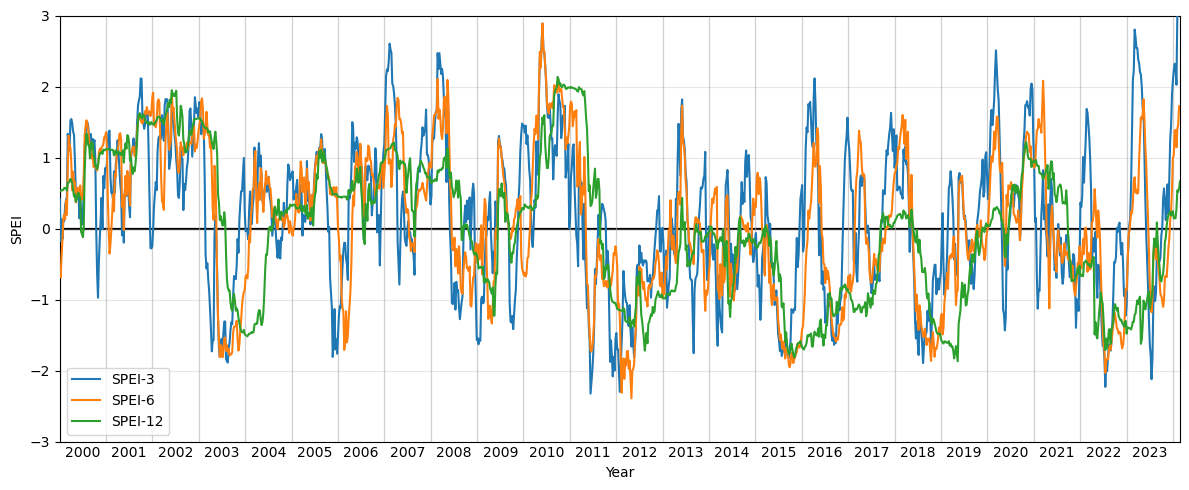

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# week -> date (Monday of ISO week)
df['date'] = pd.to_datetime(
    df['week'].str.replace('_', '-W') + '-1',
    format='%G-W%V-%u'
)

df = df.sort_values('date')

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(df['date'], df['SPEI_3'], label='SPEI-3', zorder=3)
ax.plot(df['date'], df['SPEI_6'], label='SPEI-6', zorder=3)
ax.plot(df['date'], df['SPEI_12'], label='SPEI-12', zorder=3)

ax.set_xlabel('Year')
ax.set_ylabel('SPEI')
ax.legend()

# horizontal grid only
ax.grid(True, axis='y', alpha=0.3)
ax.grid(False, axis='x')

# --- get grid color ---
grid_color = ax.get_ygridlines()[0].get_color()

# --- year boundaries & centered labels ---
first_year = df['date'].dt.year.min()
last_year  = df['date'].dt.year.max()

boundaries = [pd.Timestamp(y, 1, 1) for y in range(first_year, last_year + 2)]

# vertical year lines in SAME color as grid
for b in boundaries:
    ax.axvline(b, color=grid_color, linewidth=0.9, alpha=0.6)

centers = [boundaries[i] + (boundaries[i+1] - boundaries[i]) / 2
           for i in range(len(boundaries) - 1)]
labels = [str(y) for y in range(first_year, last_year + 1)]
ax.axhline(
    0,
    color='black',
    linewidth=1.6,
    zorder=1
)
ax.set_xticks(centers)
ax.set_xticklabels(labels)
ax.tick_params(axis='x', which='both', length=0)

ax.set_xlim(df['date'].min(), df['date'].max())
ax.set_ylim(-3, 3)
plt.tight_layout()
plt.show()


In [15]:
df2 = pd.read_excel(r'U:\Paper_1\diebacks_ha_for_plot.xlsx')
df2.columns = df2.columns.astype(str).str.strip()
df2

,year_month,total,partial
0,2000_6,17.57,44.64
1,2000_7,1.60,18.75
2,2000_9,0.18,7.56
3,2001_6,0.02,1.63
4,2002_6,0.09,24.17
5,2003_6,42.19,96.95
6,2003_9,10.41,65.83
7,2004_6,0.18,6.29
8,2005_6,0.00,0.55
9,2006_6,0.00,0.05


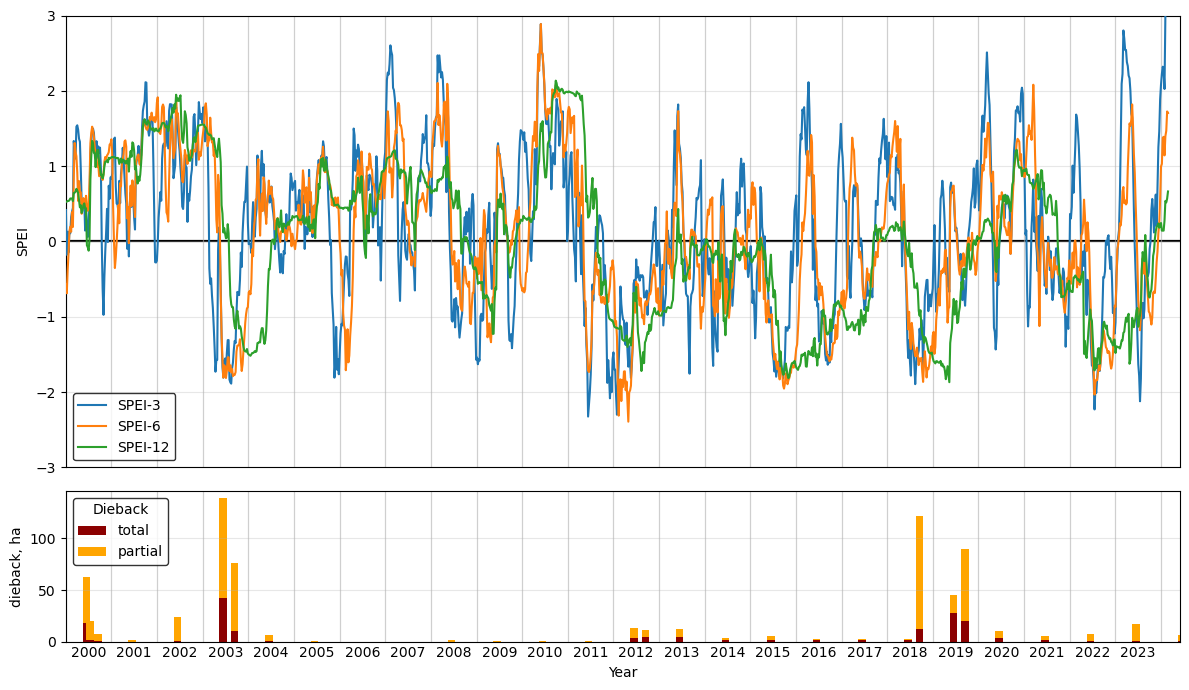

In [6]:
# GRAPH - VERSION 1

import pandas as pd
import matplotlib.pyplot as plt

# =========================================================
# 1) PREPARE df: weekly SPEI time series (top panel)
# =========================================================
df['date'] = pd.to_datetime(
    df['week'].astype(str).str.replace('_', '-W') + '-1',
    format='%G-W%V-%u'
)
df = df.sort_values('date')

# =========================================================
# 2) PREPARE df2: monthly stacked bars (bottom panel)
#    year_month format: "YYYY_M" or "YYYY_MM"
# =========================================================
df2 = df2.copy()

ym = df2['year_month'].astype(str).str.split('_', expand=True)
df2['year'] = ym[0].astype(int)
df2['month'] = ym[1].astype(int)

df2['ym_date'] = pd.to_datetime(
    dict(year=df2['year'], month=df2['month'], day=1)
)

# sum duplicates (e.g. 2006_6 appears twice)
df2 = (
    df2.groupby('ym_date', as_index=False)[['total', 'partial']]
       .sum()
       .sort_values('ym_date')
)

# place bars roughly mid-month (exact alignment not required)
df2['bar_date'] = df2['ym_date'] + pd.offsets.Day(14)

# =========================================================
# 3) YEAR BOUNDARIES & CENTERED YEAR LABELS
# =========================================================
min_date = min(df['date'].min(), df2['ym_date'].min())
max_date = max(df['date'].max(), df2['ym_date'].max())

first_year = min_date.year
last_year  = max_date.year

# year boundaries (Jan 1)
boundaries = [pd.Timestamp(y, 1, 1) for y in range(first_year, last_year + 2)]

# label positions (centered between boundaries)
centers = [
    boundaries[i] + (boundaries[i + 1] - boundaries[i]) / 2
    for i in range(len(boundaries) - 1)
]
year_labels = [str(y) for y in range(first_year, last_year + 1)]

# =========================================================
# 4) PLOT: TOP (LINES) + BOTTOM (STACKED BARS)
# =========================================================
fig, (ax1, ax2) = plt.subplots(
    2, 1,
    figsize=(12, 7),
    sharex=True,
    gridspec_kw={'height_ratios': [3, 1]}
)

# -------------------------
# TOP PANEL: SPEI lines
# -------------------------
ax1.plot(df['date'], df['SPEI_3'], label='SPEI-3', zorder=3)
ax1.plot(df['date'], df['SPEI_6'], label='SPEI-6', zorder=3)
ax1.plot(df['date'], df['SPEI_12'], label='SPEI-12', zorder=3)

ax1.set_ylabel('SPEI')
ax1.set_ylim(-3, 3)

# horizontal grid only
ax1.grid(True, axis='y', alpha=0.3)
ax1.grid(False, axis='x')

# bold zero line (black, under curves)
ax1.axhline(0, color='black', linewidth=1.6, zorder=1)
ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax1.legend(frameon=True,
    facecolor='white',
    edgecolor='black')

# -------------------------
# BOTTOM PANEL: stacked bars
# -------------------------
bar_width_days = 60  # wide bars (≈2 months)

ax2.bar(
    df2['bar_date'],
    df2['total'],
    width=bar_width_days,
    color='darkred',
    label='total'
)

ax2.bar(
    df2['bar_date'],
    df2['partial'],
    width=bar_width_days,
    bottom=df2['total'],
    color='orange',
    label='partial'
)

ax2.set_ylabel('dieback, ha')

# horizontal grid only
ax2.grid(True, axis='y', alpha=0.3)
ax2.grid(False, axis='x')

# =========================================================
# 5) YEAR BOUNDARY LINES (same color as grid)
# =========================================================
grid_color = ax1.get_ygridlines()[0].get_color()

for b in boundaries:
    ax1.axvline(b, color=grid_color, linewidth=0.9, alpha=0.6)
    ax2.axvline(b, color=grid_color, linewidth=0.9, alpha=0.6)

# =========================================================
# 6) X AXIS: centered year labels only (no tick marks)
# =========================================================
ax2.set_xticks(centers)
ax2.set_xticklabels(year_labels)
ax2.tick_params(axis='x', which='both', length=0)
ax2.set_xlabel('Year')

ax2.set_xlim(min_date, max_date)
ax2.legend(
    title='Dieback',
    loc='upper left',
    frameon=True,
    facecolor='white',
    edgecolor='black'
)
plt.tight_layout()
plt.show()


In [10]:
df2.columns = df2.columns.astype(str).str.strip()

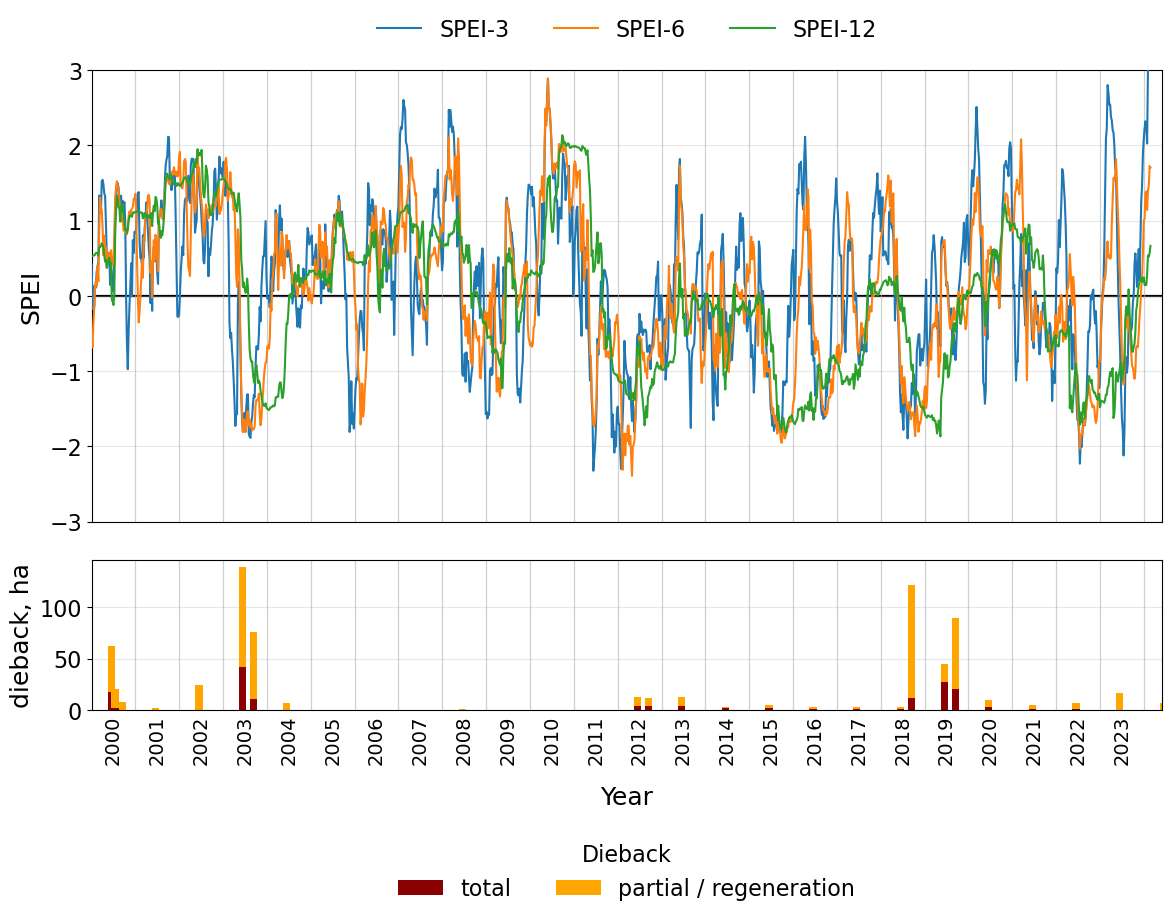

In [35]:
# GRAPH - VERSION 2 (for the paper)

import pandas as pd
import matplotlib.pyplot as plt

df2 = pd.read_excel(r'U:\Paper_1\diebacks_ha_for_plot.xlsx')
df2.columns = df2.columns.astype(str).str.strip()
plt.rcParams.update({
    "font.size": 16,          # default text
    "axes.labelsize": 18,     # axis labels
    "xtick.labelsize": 16,    # x-axis ticks (years)
    "ytick.labelsize": 16,    # y-axis ticks
    "legend.fontsize": 16,
    "legend.title_fontsize": 16
})
# =========================================================
# 1) PREPARE df: weekly SPEI time series (top panel)
# =========================================================
df['date'] = pd.to_datetime(
    df['week'].astype(str).str.replace('_', '-W') + '-1',
    format='%G-W%V-%u'
)
df = df.sort_values('date')

# =========================================================
# 2) PREPARE df2: monthly stacked bars (bottom panel)
#    year_month format: "YYYY_M" or "YYYY_MM"
# =========================================================
df2 = df2.copy()

ym = df2['year_month'].astype(str).str.split('_', expand=True)
df2['year'] = ym[0].astype(int)
df2['month'] = ym[1].astype(int)

df2['ym_date'] = pd.to_datetime(
    dict(year=df2['year'], month=df2['month'], day=1)
)

# sum duplicates (e.g. 2006_6 appears twice)
df2 = (
    df2.groupby('ym_date', as_index=False)[['total', 'partial']]
       .sum()
       .sort_values('ym_date')
)

# place bars roughly mid-month (exact alignment not required)
df2['bar_date'] = df2['ym_date'] + pd.offsets.Day(14)

# =========================================================
# 3) YEAR BOUNDARIES & CENTERED YEAR LABELS
# =========================================================
min_date = min(df['date'].min(), df2['ym_date'].min())
max_date = max(df['date'].max(), df2['ym_date'].max())

first_year = min_date.year
last_year  = max_date.year

# year boundaries (Jan 1)
boundaries = [pd.Timestamp(y, 1, 1) for y in range(first_year, last_year + 2)]

# label positions (centered between boundaries)
centers = [
    boundaries[i] + (boundaries[i + 1] - boundaries[i]) / 2
    for i in range(len(boundaries) - 1)
]
year_labels = [str(y) for y in range(first_year, last_year + 1)]

# =========================================================
# 4) PLOT: TOP (LINES) + BOTTOM (STACKED BARS)
# =========================================================
fig, (ax1, ax2) = plt.subplots(
    2, 1,
    figsize=(12, 12),
    sharex=True,
    gridspec_kw={'height_ratios': [3, 1]}
)

# -------------------------
# TOP PANEL: SPEI lines
# -------------------------
ax1.plot(df['date'], df['SPEI_3'], label='SPEI-3', zorder=3)
ax1.plot(df['date'], df['SPEI_6'], label='SPEI-6', zorder=3)
ax1.plot(df['date'], df['SPEI_12'], label='SPEI-12', zorder=3)

ax1.set_ylabel('SPEI')
ax1.set_ylim(-3, 3)

# horizontal grid only
ax1.grid(True, axis='y', alpha=0.3)
ax1.grid(False, axis='x')

# bold zero line (black, under curves)
ax1.axhline(0, color='black', linewidth=1.6, zorder=1)
ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax1.legend(
    loc='lower center',
    bbox_to_anchor=(0.5, 1.02),   # above ax1
    ncol=3,
    frameon=False,
    facecolor='white',
    edgecolor='black'
)

# -------------------------
# BOTTOM PANEL: stacked bars
# -------------------------
bar_width_days = 60  # wide bars (≈2 months)

ax2.bar(
    df2['bar_date'],
    df2['total'],
    width=bar_width_days,
    color='darkred',
    label='total'
)

ax2.bar(
    df2['bar_date'],
    df2['partial'],
    width=bar_width_days,
    bottom=df2['total'],
    color='orange',
    label='partial / regeneration'
)

ax2.set_ylabel('dieback, ha')

# horizontal grid only
ax2.grid(True, axis='y', alpha=0.3)
ax2.grid(False, axis='x')

# =========================================================
# 5) YEAR BOUNDARY LINES (same color as grid)
# =========================================================
grid_color = ax1.get_ygridlines()[0].get_color()

for b in boundaries:
    ax1.axvline(b, color=grid_color, linewidth=0.9, alpha=0.6)
    ax2.axvline(b, color=grid_color, linewidth=0.9, alpha=0.6)

# =========================================================
# 6) X AXIS: centered year labels only (no tick marks)
# =========================================================
ax2.set_xticks(centers)
ax2.set_xticklabels(year_labels, rotation=90, fontsize=14)
ax2.tick_params(axis='x', which='both', length=0)
ax2.set_xlabel('Year', labelpad=15)

ax2.set_xlim(min_date, max_date)
ax2.legend(
    title='Dieback',
    loc='upper center',
    bbox_to_anchor=(0.5, -0.75),   # lower than before
    ncol=2,
    frameon=False,
    facecolor='white',
    edgecolor='black'
)
plt.tight_layout(rect=[0, 0.12, 1, 0.95])
plt.savefig(r"U:\Paper_1\spei_Fig_10.png", dpi=900, bbox_inches="tight")
plt.show()